In [1]:
from qiskit_aer import AerSimulator

In [4]:
from qiskit import QuantumCircuit
from qiskit.transpile import execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize 9 qubits and 1 classical register per stabilizer
qc = QuantumCircuit(9, 3)  # 9 physical qubits, 3 classical bits for syndromes

# Encoding logical |0_L⟩ state
# Logical qubit is encoded as |0⟩_L = (|000⟩ + |111⟩)⊗3 (repetition in X and Z basis)
for i in [0, 3, 6]:
    qc.h(i)
    qc.cx(i, i+1)
    qc.cx(i, i+2)

# Simulate a bit-flip (X error) on qubit 1
qc.x(1)

# Syndrome measurement (stabilizers)
# X-stabilizers to detect Z errors would need ancillas, here we show Z-stabilizers (for X errors)
# Measure parity between neighboring qubits
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure(1, 0)

qc.cx(3, 4)
qc.cx(4, 5)
qc.measure(4, 1)

qc.cx(6, 7)
qc.cx(7, 8)
qc.measure(7, 2)

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts()

# Show result
print("Syndrome Measurement Results:")
print(counts)
plot_histogram(counts)
plt.show()


ModuleNotFoundError: No module named 'qiskit.transpile'

Syndrome Results: {'001': 1024}


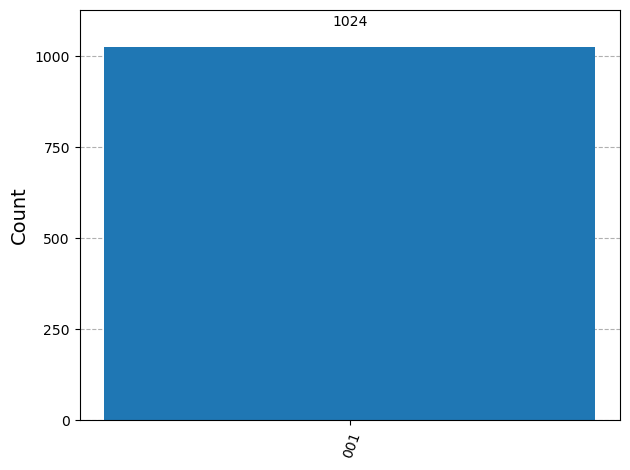

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
import matplotlib.pyplot as plt

# Create 9-qubit quantum circuit with 3 classical bits
qc = QuantumCircuit(9, 3)

# Encode logical qubit using 3 GHZ states
for i in [0, 3, 6]:
    qc.h(i)
    qc.cx(i, i+1)
    qc.cx(i, i+2)

# Inject a bit-flip error on qubit 1
qc.x(1)

# Add Z-type stabilizers (measure parity to detect X errors)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure(1, 0)

qc.cx(3, 4)
qc.cx(4, 5)
qc.measure(4, 1)

qc.cx(6, 7)
qc.cx(7, 8)
qc.measure(7, 2)

# Create simulator and transpile the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Run the circuit
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# Display result
print("Syndrome Results:", counts)
plot_histogram(counts)

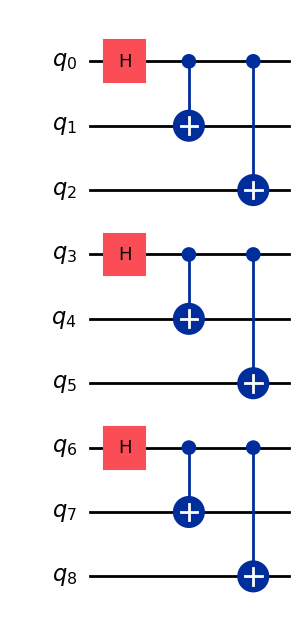

In [7]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# 9 physical qubits
qc = QuantumCircuit(9)

# Step 1: Make 3 GHZ states
for i in [0, 3, 6]:
    qc.h(i)
    qc.cx(i, i+1)
    qc.cx(i, i+2)

qc.draw('mpl')

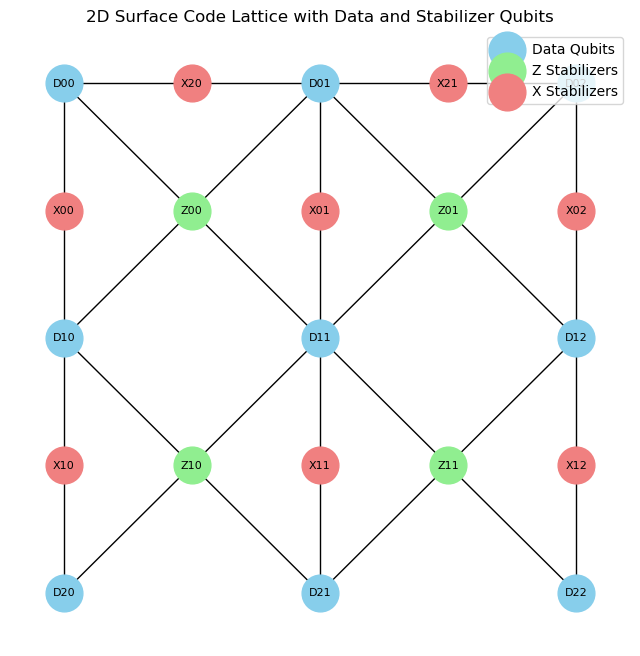

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

# Step 1: Add 3x3 data qubits
data_qubits = {(i, j): f'D{i}{j}' for i in range(3) for j in range(3)}
G.add_nodes_from(data_qubits.keys())

# Step 2: Add stabilizers (Z-plaquette: green, X-star: red)
z_stabilizers = {(i + 0.5, j + 0.5): f'Z{i}{j}' for i in range(2) for j in range(2)}
x_stabilizers = {(i + 0.5, j): f'X{i}{j}' for i in range(2) for j in range(3)}
x_stabilizers.update({(i, j + 0.5): f'X{i+2}{j}' for i in range(1) for j in range(2)})

# Step 3: Connect stabilizers to nearby data qubits (ideal for visualization)
for (i, j), label in z_stabilizers.items():
    for dx in [0, 1]:
        for dy in [0, 1]:
            G.add_edge((i, j), (i - 0.5 + dx, j - 0.5 + dy))

for (i, j), label in x_stabilizers.items():
    nearby = [(i - 0.5, j), (i + 0.5, j), (i, j - 0.5), (i, j + 0.5)]
    for x, y in nearby:
        if (x, y) in data_qubits:
            G.add_edge((i, j), (x, y))

# Step 4: Draw all
pos = {**{k: (k[1], -k[0]) for k in data_qubits},
       **{k: (k[1], -k[0]) for k in z_stabilizers},
       **{k: (k[1], -k[0]) for k in x_stabilizers}}

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, nodelist=data_qubits.keys(), node_color='skyblue', label='Data Qubits', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=z_stabilizers.keys(), node_color='lightgreen', label='Z Stabilizers', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=x_stabilizers.keys(), node_color='lightcoral', label='X Stabilizers', node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={**data_qubits, **z_stabilizers, **x_stabilizers}, font_size=8)

plt.title("2D Surface Code Lattice with Data and Stabilizer Qubits")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.show()

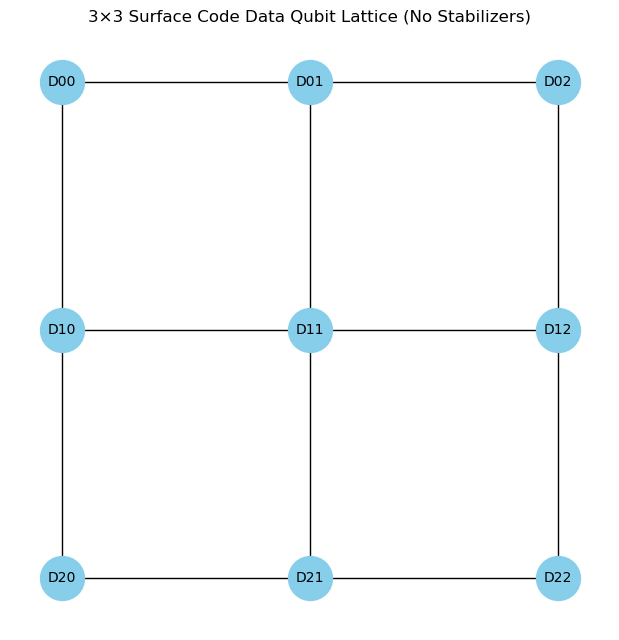

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add 3x3 data qubits (D00 to D22)
data_qubits = {(i, j): f'D{i}{j}' for i in range(3) for j in range(3)}
G.add_nodes_from(data_qubits.keys())

# Add edges between adjacent data qubits (just for visual structure)
for i in range(3):
    for j in range(3):
        if i < 2:
            G.add_edge((i, j), (i + 1, j))
        if j < 2:
            G.add_edge((i, j), (i, j + 1))

# Set positions for plotting
pos = {k: (k[1], -k[0]) for k in data_qubits}

# Draw
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True,
        labels=data_qubits,
        node_size=1000,
        node_color='skyblue',
        font_size=10)

plt.title("3×3 Surface Code Data Qubit Lattice (No Stabilizers)")
plt.axis('off')
plt.show()

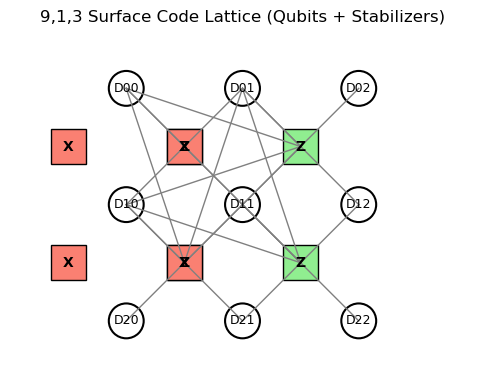

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# Data qubit positions (3x3 grid)
data_pos = {
    'D00': (0, 2), 'D01': (2, 2), 'D02': (4, 2),
    'D10': (0, 0), 'D11': (2, 0), 'D12': (4, 0),
    'D20': (0, -2), 'D21': (2, -2), 'D22': (4, -2)
}

# Ancilla qubit positions for X and Z stabilizers
z_ancilla = {
    'Z00': (1, 1), 'Z01': (3, 1),
    'Z10': (1, -1), 'Z11': (3, -1)
}

x_ancilla = {
    'X00': (-1, 1), 'X01': (1, 1),
    'X10': (-1, -1), 'X11': (1, -1)
}

# Plot data qubits
for label, (x, y) in data_pos.items():
    circle = plt.Circle((x, y), 0.3, color='white', ec='black', lw=1.5)
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=9)

# Plot Z-stabilizers (green squares)
for label, (x, y) in z_ancilla.items():
    square = plt.Rectangle((x - 0.3, y - 0.3), 0.6, 0.6, color='lightgreen', ec='black')
    ax.add_patch(square)
    ax.text(x, y, 'Z', ha='center', va='center', fontsize=10, fontweight='bold')

# Plot X-stabilizers (red squares)
for label, (x, y) in x_ancilla.items():
    square = plt.Rectangle((x - 0.3, y - 0.3), 0.6, 0.6, color='salmon', ec='black')
    ax.add_patch(square)
    ax.text(x, y, 'X', ha='center', va='center', fontsize=10, fontweight='bold')

# Draw connections from stabilizers to nearby data qubits
def draw_edges(stabilizer_pos, data_labels, offset):
    for s_label, (sx, sy) in stabilizer_pos.items():
        for dx, dy in data_labels:
            ax.plot([sx, dx], [sy, dy], 'gray', lw=1)

# Connect Z stabilizers to their 4 data qubits
draw_edges(z_ancilla, [(0,2), (2,2), (0,0), (2,0)], offset=1)
draw_edges({'Z01': (3,1)}, [(2,2), (4,2), (2,0), (4,0)], offset=1)
draw_edges({'Z10': (1,-1)}, [(0,0), (2,0), (0,-2), (2,-2)], offset=1)
draw_edges({'Z11': (3,-1)}, [(2,0), (4,0), (2,-2), (4,-2)], offset=1)

# Set plot limits and remove axes
ax.set_xlim(-2, 6)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.axis('off')
plt.title("9,1,3 Surface Code Lattice (Qubits + Stabilizers)")
plt.show()

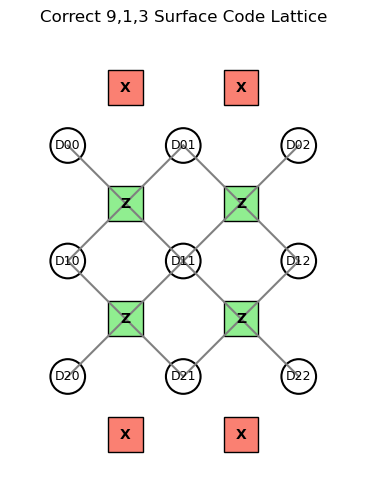

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# Data qubits (3x3 grid)
data_qubits = {
    'D00': (0, 2), 'D01': (2, 2), 'D02': (4, 2),
    'D10': (0, 0), 'D11': (2, 0), 'D12': (4, 0),
    'D20': (0, -2), 'D21': (2, -2), 'D22': (4, -2)
}

# Z Stabilizers (green)
z_stabilizers = {
    'Z0': (1, 1), 'Z1': (3, 1),
    'Z2': (1, -1), 'Z3': (3, -1)
}

# X Stabilizers (red)
x_stabilizers = {
    'X0': (1, 3), 'X1': (3, 3),
    'X2': (1, -3), 'X3': (3, -3)
}

# Draw data qubits
for label, (x, y) in data_qubits.items():
    circle = plt.Circle((x, y), 0.3, color='white', ec='black', lw=1.5)
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=9)

# Draw Z stabilizers
for label, (x, y) in z_stabilizers.items():
    square = plt.Rectangle((x - 0.3, y - 0.3), 0.6, 0.6, color='lightgreen', ec='black')
    ax.add_patch(square)
    ax.text(x, y, 'Z', ha='center', va='center', fontsize=10, fontweight='bold')

# Draw X stabilizers
for label, (x, y) in x_stabilizers.items():
    square = plt.Rectangle((x - 0.3, y - 0.3), 0.6, 0.6, color='salmon', ec='black')
    ax.add_patch(square)
    ax.text(x, y, 'X', ha='center', va='center', fontsize=10, fontweight='bold')

# Draw edges from Z stabilizers to 4 surrounding data qubits
z_connections = {
    'Z0': ['D00', 'D01', 'D10', 'D11'],
    'Z1': ['D01', 'D02', 'D11', 'D12'],
    'Z2': ['D10', 'D11', 'D20', 'D21'],
    'Z3': ['D11', 'D12', 'D21', 'D22']
}

for stab, qubits in z_connections.items():
    sx, sy = z_stabilizers[stab]
    for q in qubits:
        dx, dy = data_qubits[q]
        ax.plot([sx, dx], [sy, dy], color='gray')

# Same for X stabilizers (optional for deeper layouts)

# Set limits and remove axes
ax.set_xlim(-1, 5)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Correct 9,1,3 Surface Code Lattice")
plt.show()

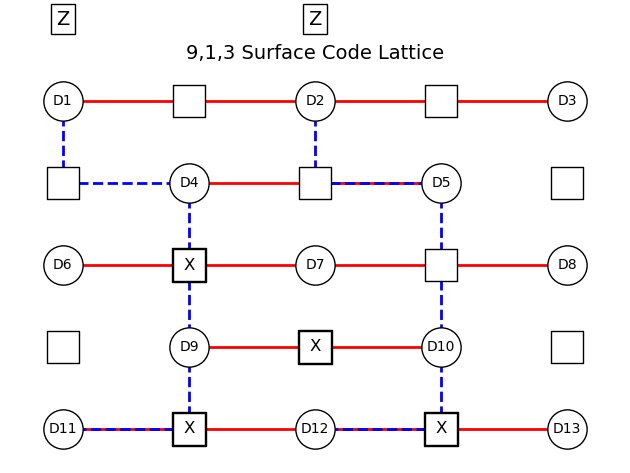

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graph
G = nx.Graph()

# Define positions for data qubits (circles)
data_qubits = {
    'D1': (0, 4), 'D2': (2, 4), 'D3': (4, 4),
    'D4': (1, 3), 'D5': (3, 3),
    'D6': (0, 2), 'D7': (2, 2), 'D8': (4, 2),
    'D9': (1, 1), 'D10': (3, 1),
    'D11': (0, 0), 'D12': (2, 0), 'D13': (4, 0),
}

# Ancilla qubit positions (white squares for connections only)
ancilla_qubits = {
    'A1': (1, 4), 'A2': (3, 4),
    'A3': (0, 3), 'A4': (2, 3), 'A5': (4, 3),
    'A6': (1, 2), 'A7': (3, 2),
    'A8': (0, 1), 'A9': (2, 1), 'A10': (4, 1),
    'A11': (1, 0), 'A12': (3, 0),
}

# Add nodes
G.add_nodes_from(data_qubits.keys())
G.add_nodes_from(ancilla_qubits.keys())

# Define edges as per lattice (horizontal red edges)
red_edges = [
    ('D1', 'A1'), ('A1', 'D2'), ('D2', 'A2'), ('A2', 'D3'),
    ('D4', 'A4'), ('A4', 'D5'),
    ('D6', 'A6'), ('A6', 'D7'), ('D7', 'A7'), ('A7', 'D8'),
    ('D9', 'A9'), ('A9', 'D10'),
    ('D11', 'A11'), ('A11', 'D12'), ('D12', 'A12'), ('A12', 'D13')
]

# Vertical dashed blue edges
blue_edges = [
    ('D1', 'A3'), ('A3', 'D4'), ('D4', 'A6'), ('A6', 'D9'), ('D9', 'A11'), ('A11', 'D11'),
    ('D2', 'A4'), ('A4', 'D5'), ('D5', 'A7'), ('A7', 'D10'), ('D10', 'A12'), ('A12', 'D12')
]

# Add edges to graph
G.add_edges_from(red_edges + blue_edges)

# Combine positions
pos = {**data_qubits, **ancilla_qubits}

# Draw red solid edges
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='red', width=2)

# Draw blue dashed edges
nx.draw_networkx_edges(G, pos, edgelist=blue_edges, edge_color='blue', style='dashed', width=2)

# Draw data qubits (white circles)
nx.draw_networkx_nodes(G, pos, nodelist=data_qubits.keys(), node_shape='o', node_color='white', edgecolors='black', node_size=800)

# Draw ancilla qubits (white squares)
nx.draw_networkx_nodes(G, pos, nodelist=ancilla_qubits.keys(), node_shape='s', node_color='white', edgecolors='black', node_size=500)

# Draw X stabilizers as filled red squares with 'X' labels
x_stabilizers = {'A6', 'A9', 'A11', 'A12'}
for node in x_stabilizers:
    plt.scatter(*pos[node], s=600, color='red', marker='s', edgecolors='black')
    plt.text(pos[node][0], pos[node][1], 'X', fontsize=12, ha='center', va='center', color='black')

# Draw Z stabilizers as labels above
plt.text(0, 5, 'Z', fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))
plt.text(2, 5, 'Z', fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

# Draw labels for D nodes
labels = {key: key for key in data_qubits}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

# Clean plot
plt.axis('off')
plt.title("9,1,3 Surface Code Lattice", fontsize=14)
plt.tight_layout()
plt.show()


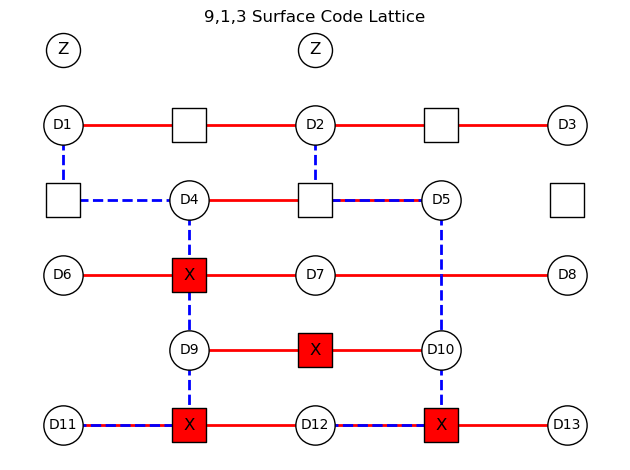

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

# Define positions
data_qubits = {
    'D1': (0, 4), 'D2': (2, 4), 'D3': (4, 4),
    'D4': (1, 3), 'D5': (3, 3),
    'D6': (0, 2), 'D7': (2, 2), 'D8': (4, 2),
    'D9': (1, 1), 'D10': (3, 1),
    'D11': (0, 0), 'D12': (2, 0), 'D13': (4, 0),
}

ancilla = {
    'A1': (1, 4), 'A2': (3, 4),
    'A3': (0, 3), 'A4': (2, 3), 'A5': (4, 3),
    'A6': (1, 2), 'A7': (3, 2),
    'A8': (0, 1), 'A9': (2, 1), 'A10': (4, 1),
    'A11': (1, 0), 'A12': (3, 0),
}

# Merge all for drawing
positions = {**data_qubits, **ancilla}
G.add_nodes_from(positions)

# Red edges: horizontal
red_edges = [
    ('D1', 'A1'), ('A1', 'D2'), ('D2', 'A2'), ('A2', 'D3'),
    ('D4', 'A4'), ('A4', 'D5'),
    ('D6', 'A6'), ('A6', 'D7'), ('D7', 'A7'), ('A7', 'D8'),
    ('D9', 'A9'), ('A9', 'D10'),
    ('D11', 'A11'), ('A11', 'D12'), ('D12', 'A12'), ('A12', 'D13')
]

# Blue dashed edges: vertical
blue_edges = [
    ('D1', 'A3'), ('A3', 'D4'), ('D4', 'A6'), ('A6', 'D9'), ('D9', 'A11'), ('A11', 'D11'),
    ('D2', 'A4'), ('A4', 'D5'), ('D5', 'A7'), ('A7', 'D10'), ('D10', 'A12'), ('A12', 'D12')
]

G.add_edges_from(red_edges + blue_edges)

# Draw edges
nx.draw_networkx_edges(G, positions, edgelist=red_edges, edge_color='red', width=2)
nx.draw_networkx_edges(G, positions, edgelist=blue_edges, edge_color='blue', style='dashed', width=2)

# Draw data qubits (circles)
nx.draw_networkx_nodes(G, positions, nodelist=data_qubits.keys(),
                       node_shape='o', node_color='white', edgecolors='black', node_size=800)

# Draw ancilla (squares, white)
non_stabilizer_ancillas = {'A1', 'A2', 'A3', 'A4', 'A5'}
nx.draw_networkx_nodes(G, positions, nodelist=non_stabilizer_ancillas,
                       node_shape='s', node_color='white', edgecolors='black', node_size=600)

# Draw X stabilizers (filled squares)
x_stabilizers = {'A6', 'A9', 'A11', 'A12'}
for node in x_stabilizers:
    x, y = positions[node]
    plt.scatter(x, y, color='red', edgecolors='black', s=600, marker='s')
    plt.text(x, y, 'X', fontsize=12, ha='center', va='center', color='black')

# Draw Z stabilizers (circles with 'Z') on top
z_positions = [(0, 5), (2, 5)]
for x, y in z_positions:
    plt.scatter(x, y, color='white', edgecolors='black', s=600, marker='o')
    plt.text(x, y, 'Z', fontsize=12, ha='center', va='center')

# Label data qubits
labels = {k: k for k in data_qubits}
nx.draw_networkx_labels(G, positions, labels=labels, font_size=10)

# Plot settings
plt.title("9,1,3 Surface Code Lattice")
plt.axis('off')
plt.tight_layout()
plt.show()

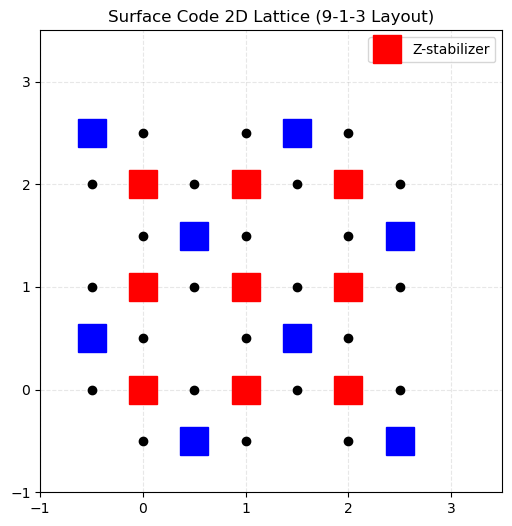

In [16]:
import matplotlib.pyplot as plt

def plot_surface_code_lattice(d=3):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot data qubits on edges (black dots)
    for x in range(d):
        for y in range(d + 1):
            ax.plot(x, y - 0.5, 'ko')  # vertical edges
    for x in range(d + 1):
        for y in range(d):
            ax.plot(x - 0.5, y, 'ko')  # horizontal edges

    # Plot Z-stabilizers (red squares) on faces
    for x in range(d):
        for y in range(d):
            ax.plot(x, y, 'rs', markersize=20, label='Z-stabilizer' if (x==0 and y==0) else "")

    # Plot X-stabilizers (blue squares) on vertices
    for x in range(d + 1):
        for y in range(d + 1):
            if (x + y) % 2 == 1:  # alternate vertices (to simulate checkerboard)
                ax.plot(x - 0.5, y - 0.5, 'bs', markersize=20, label='X-stabilizer' if (x==1 and y==1) else "")

    ax.set_aspect('equal')
    ax.set_xticks(range(-1, d + 2))
    ax.set_yticks(range(-1, d + 2))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_xlim(-1, d + 0.5)
    ax.set_ylim(-1, d + 0.5)
    ax.set_title("Surface Code 2D Lattice (9-1-3 Layout)")

    # Show legend only once
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    plt.show()

plot_surface_code_lattice(d=3)